# Example use of the Sonic module ETL_Evo.jl

This notebook is part of the technical documentation of Sonic.

In [35]:
import DataFrames, Dates, Random, StatsPlots

In [36]:
import Pkg                      # package manager
Pkg.activate("../../../")       # Project.toml
Pkg.instantiate()               # https://julialang.github.io/Pkg.jl/v1.0/index.html

Activating environment at `~/Documents/Calendar/Work/Noda/Code/Sonic.jl/Project.toml`


In [48]:
include("../../../src/ETL_Evo.jl")
ETL = ETL_Evo

Main.ETL_Evo

Get config from outside version control,

In [38]:
include("db/src/config.jl")
() # don't echo config

()

Download from remote database,

In [39]:
@time if false # toggle; this can take time
    ETL.download(
        config,
        Dates.DateTime("2019-01-01"),
        Dates.DateTime("2020-01-01"),
    )
end

  0.000001 seconds (3 allocations: 144 bytes)


Extract and transform,

In [50]:
@time if false # toggle; this can take time
    ETL.transform(
        config,
    )
end

  0.000001 seconds (4 allocations: 160 bytes)


Load,

In [51]:
@time data = ETL.load(config)
length(data)

db/bin/data/0016a5f0-ff31-4dda-9465-0aaf841ce2dd.csv: loaded
db/bin/data/0061096c-4979-4c29-986c-0f8f180c93d7.csv: loaded
db/bin/data/0073d4a1-92c5-4802-bb2f-de374a2a326a.csv: loaded
db/bin/data/00912250-7f07-4d0f-8c5c-e103b2d83f1a.csv: loaded
db/bin/data/0096d201-4b1d-4b5e-af2c-82624a47179f.csv: loaded
db/bin/data/00c7b74b-834e-4661-b02d-deb439b6a5d1.csv: loaded
db/bin/data/00df3d4f-125c-4742-a082-ec714176d7be.csv: loaded
db/bin/data/00fa68d6-b1d3-4ea1-b494-968a64143c7c.csv: loaded
db/bin/data/00fdc86e-5810-4a2e-a1cd-40a83b884e20.csv: loaded
db/bin/data/0107603c-92e0-4d50-a5aa-432c754089b3.csv: loaded
db/bin/data/012808a0-dc60-431c-98af-0ab5bb20e2d2.csv: loaded
db/bin/data/0132e424-4684-416c-b125-728e1fd90b42.csv: loaded
db/bin/data/015e9193-6ee6-4477-ba73-d0d49059b24c.csv: loaded
db/bin/data/01901839-e2e3-4363-bffd-ebe93605d76e.csv: loaded
db/bin/data/0193d08c-dd03-4207-b038-eceb9224d08c.csv: loaded
db/bin/data/019c640d-8674-4847-a35e-2bdf2d7dc4d6.csv: loaded
db/bin/data/01d88f24-ddf

1639

Pick a substation at random,

In [52]:
key = collect(keys(data))[Random.rand(1 : end)]

"6b3655a4-703f-435e-8a68-eea181e40543"

Show dataframe,

In [53]:
data[key]

,datetime,energy,flow,power,return,supply,volume
,Dates…,Float64,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64
1,2019-01-01T00:00:00,1.02125e6,0.747,31.7,37.8,74.6,44199.9
2,2019-01-01T01:00:00,1.02127e6,0.49,28.4667,missing,72.5,44200.4
3,2019-01-01T02:00:00,1.0213e6,0.931,25.2333,missing,73.6,44201.1
4,2019-01-01T03:00:00,1.02132e6,0.829667,22.0,missing,72.8,44202.1
5,2019-01-01T04:00:00,1.02134e6,0.728333,22.1,missing,73.7,44203.2
6,2019-01-01T05:00:00,1.02136e6,0.627,24.6,missing,73.0,44204.0
7,2019-01-01T06:00:00,1.02138e6,0.6465,22.4,missing,75.5,44206.1
8,2019-01-01T07:00:00,1.02141e6,0.666,23.2,missing,73.7,44207.5
9,2019-01-01T08:00:00,1.02143e6,0.982,28.7,missing,74.15,44208.3


Plot some graphics,

In [54]:
using StatsPlots
ENV["GKSwstype"] = "100"
gr(fmt = :png)

Plots.GRBackend()

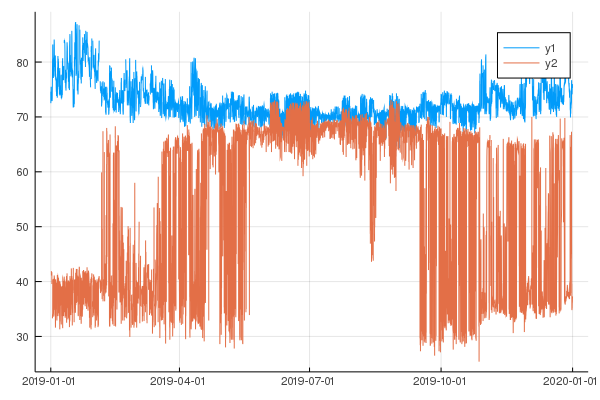

In [62]:
@df data[key] plot(
    :datetime,
    [
        :supply,
        :return,
    ],
)

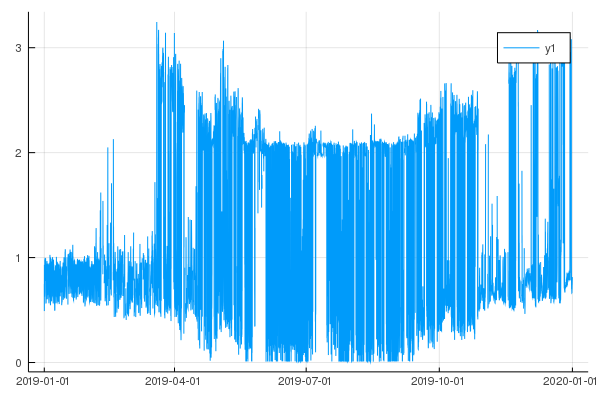

In [56]:
@df data[key] plot(:datetime, [:flow])

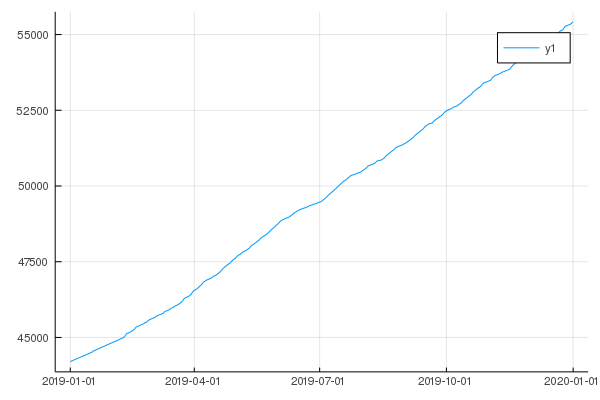

In [57]:
@df data[key] plot(:datetime, [:volume])

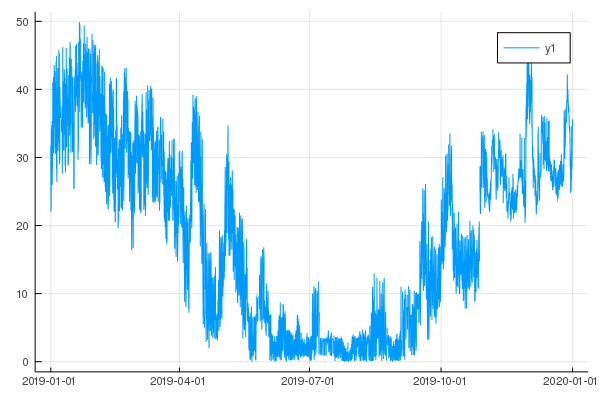

In [58]:
@df data[key] plot(:datetime, [:power])

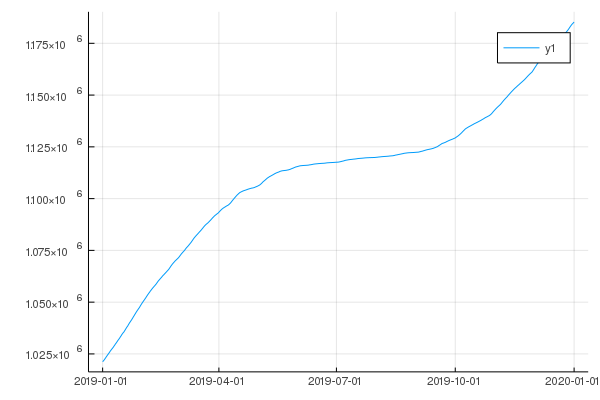

In [59]:
@df data[key] plot(:datetime, [:energy])